# **EMPRESA DE RETAIL**
Ustedes hacen parte del equipo de análisis de la información de una empresa de retail. La
organización está implementando una nueva aplicación que según el equipo de diseño está en
capacidad de atraer una mayor cantidad de usuarios, siempre y cuando se establezcan medidas de
comunicación y promoción diferencial dependiendo del tipo de cliente. Ustedes deciden entonces
implementar un modelo de datos que les permita diferenciar los clientes según su comportamiento
actual.

El equipo de mercadeo de la compañía está seguro que los clientes pueden dividirse en 3 grupos.
Por medio del modelamiento confirme o rechace esta hipótesis.



# Metodologia ASUM - DM

1. Entendimiento del negocio: Es una empresa de retail que busca implementar una nueva aplicacion la cual ayude a atraer usuarios dependiendo de caracteristicas que los diferencien para crear modelos.

2. Entendimiento analito: Disenar un experimento que permita agrupar en una cantidad especifica de grupo los clientes de la empresa para definir la cantidad de acciones diferenciadas posibles.

3. Requerimientos de datos: Se requiere datos demograficos, datos del servicio prestado del usuario, datos propios del negocio.

4. Recoleccion de datos: 

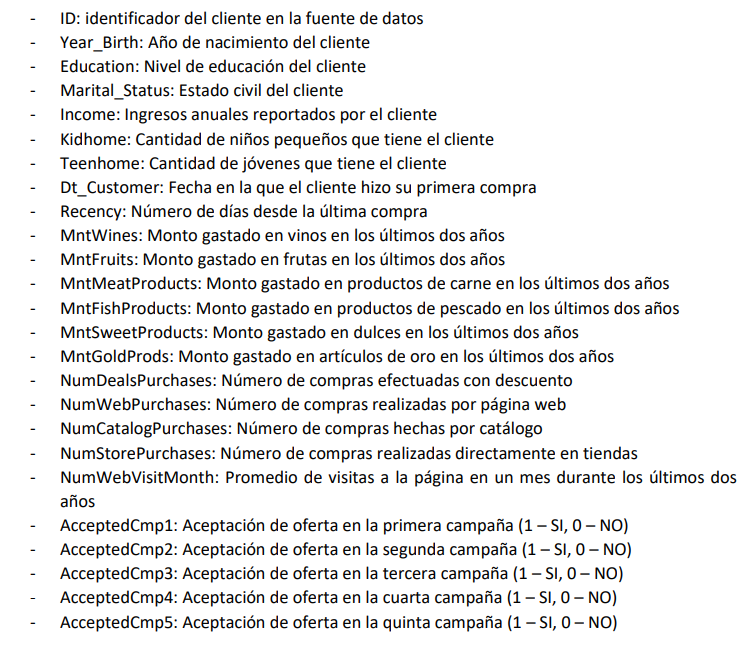
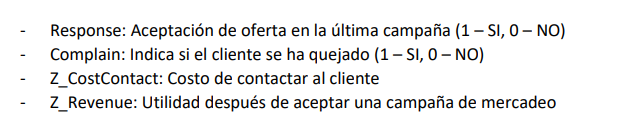

In [1]:
#librerias 
##Tratamiento estructurado de datos 
import pandas as pd
import numpy as np

##graficos 
import matplotlib.pyplot as plt
import seaborn as sb

##Advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("datos_caso_1.csv", sep=";")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

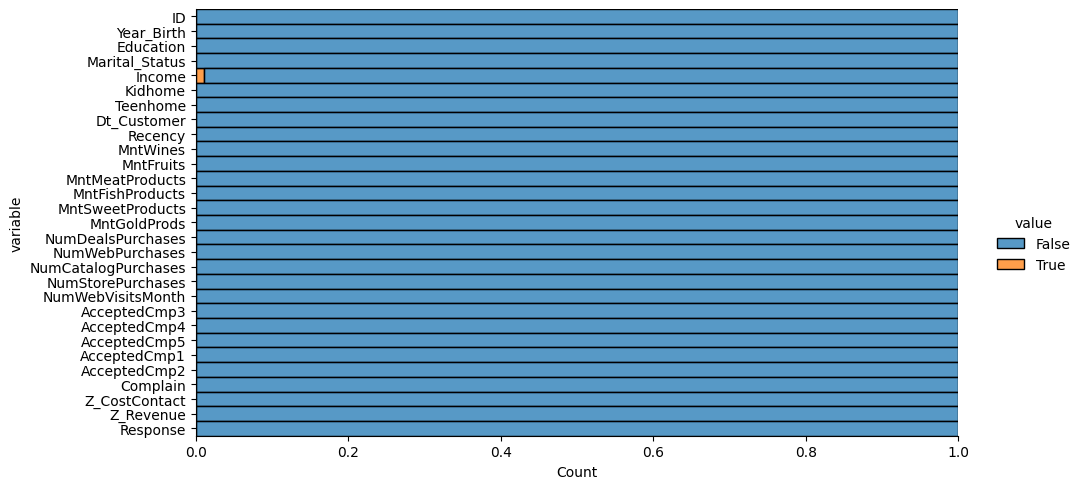

In [4]:
#Visualizar la proporcion de datos nulos por variables

data.isnull().melt().pipe(lambda df: sb.displot(data= df, y = 'variable', hue = 'value',
                                            multiple = 'fill', aspect = 2))
plt.show()

In [5]:
# Calcular el porcentaje de nulos por columna
porcentaje_nulos = data['Income'].isnull().mean() * 100

print('Porcentaje de Nulos en variable Income: '+str(porcentaje_nulos) + ' %')


Porcentaje de Nulos en variable Income: 1.0714285714285714 %


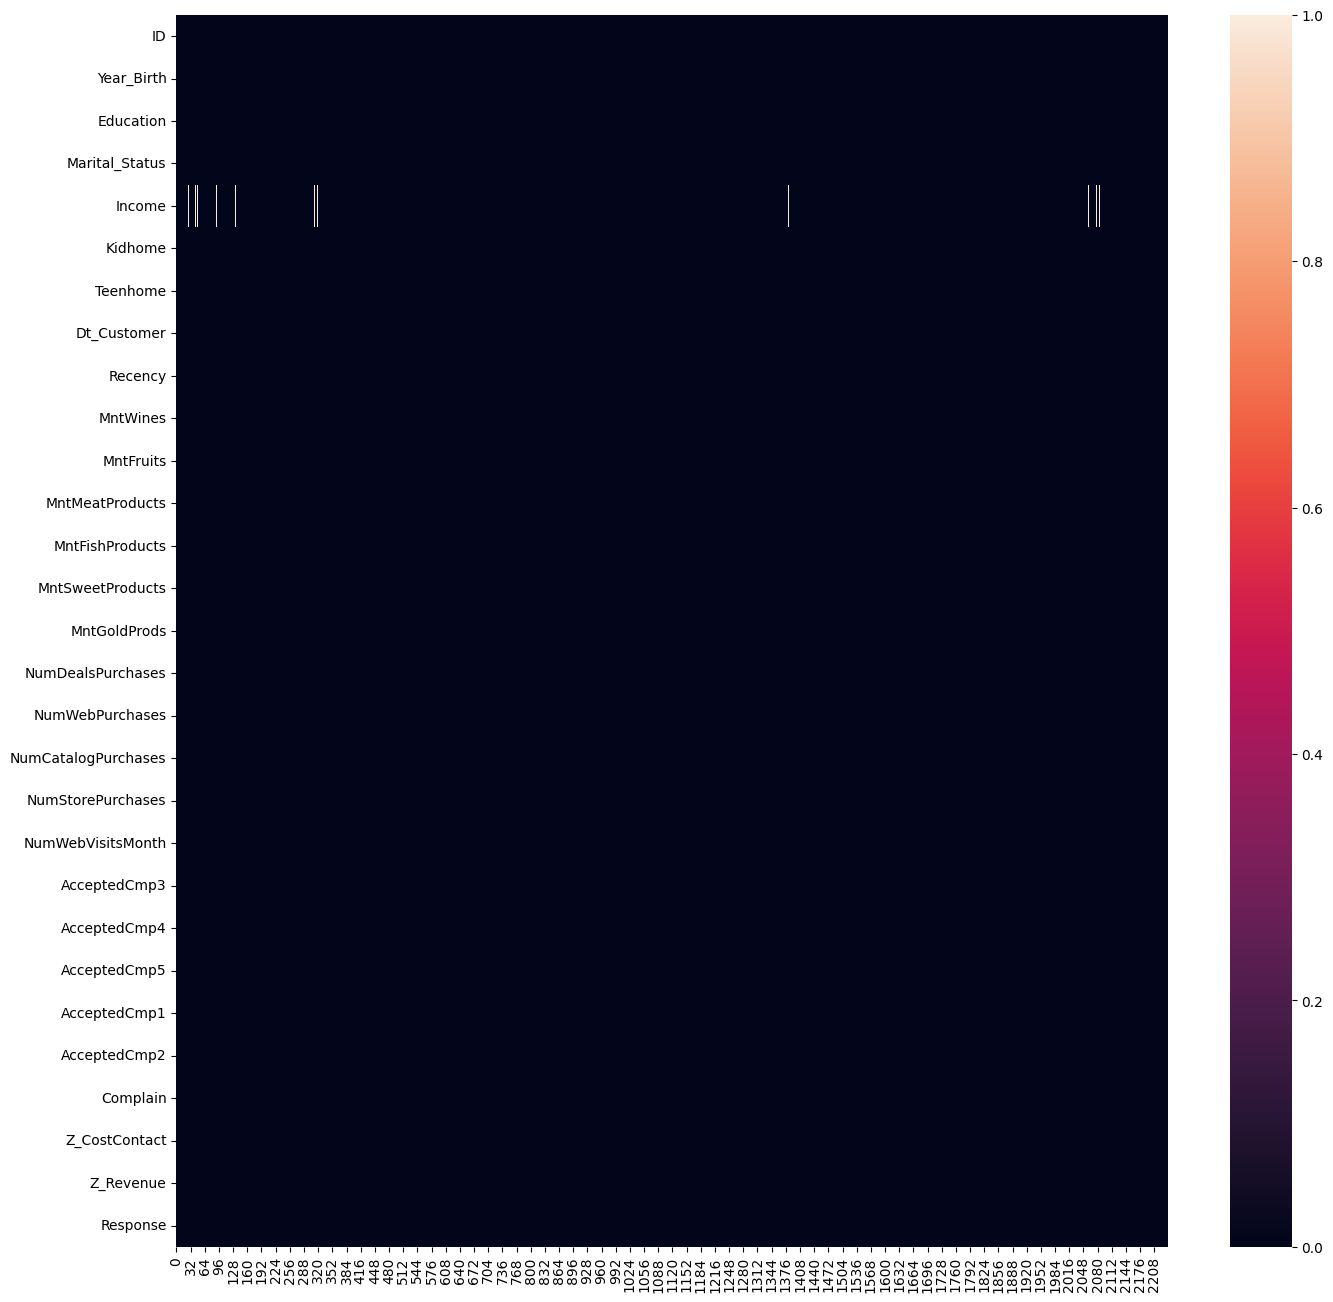

In [6]:
#Visualizar la matriz de correlacion de datos nulos por variables. Negro indica que no hay datos nulos, blanco indica que si hay datos nulos
plt.figure(figsize=(16, 16))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data=df))
plt.show()

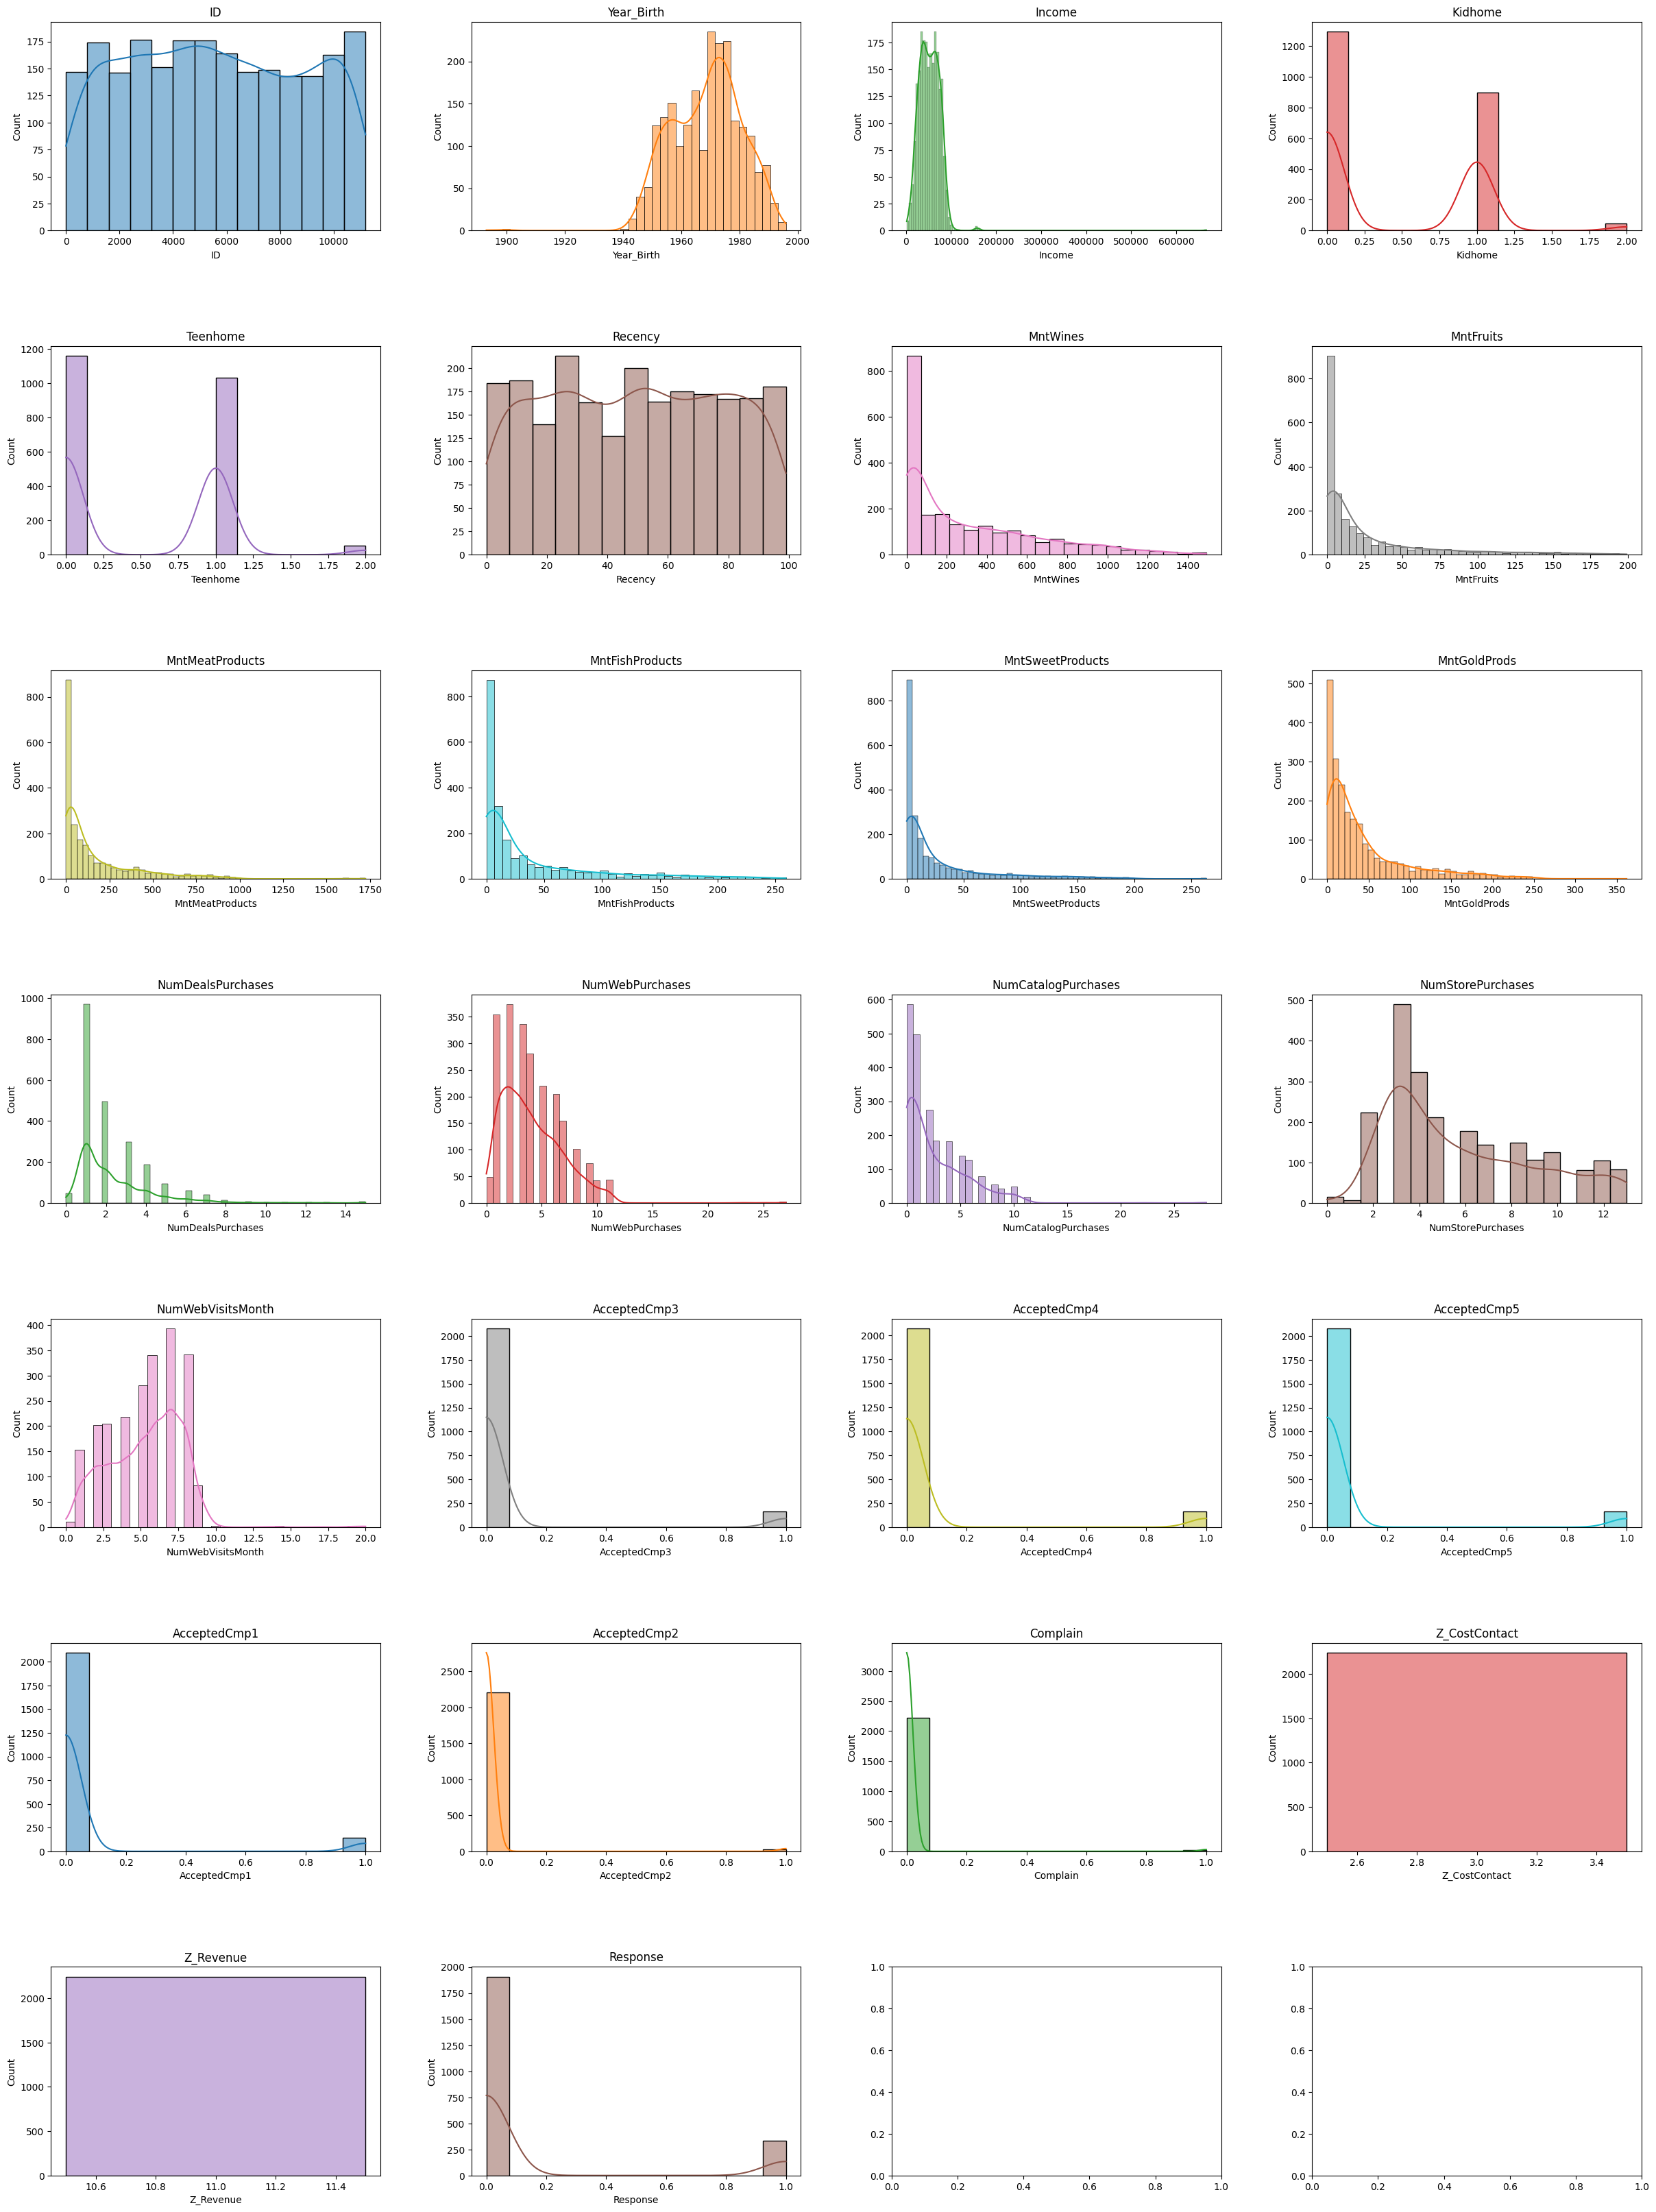

In [7]:
#Exploracion unicariada de los datos
##Para datos numericos: histogramas de frecuencia
##Para datos categoricos: graficos de torta

##HISTOGRAMA DE FRECUENCIA
fig, ax = plt.subplots(7,4, figsize = (16,16))
ax = ax.flat
num_col = data.select_dtypes(include= ['int64','float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x= col,
                kde= True, color= (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=2, right=1.5)
plt.show()

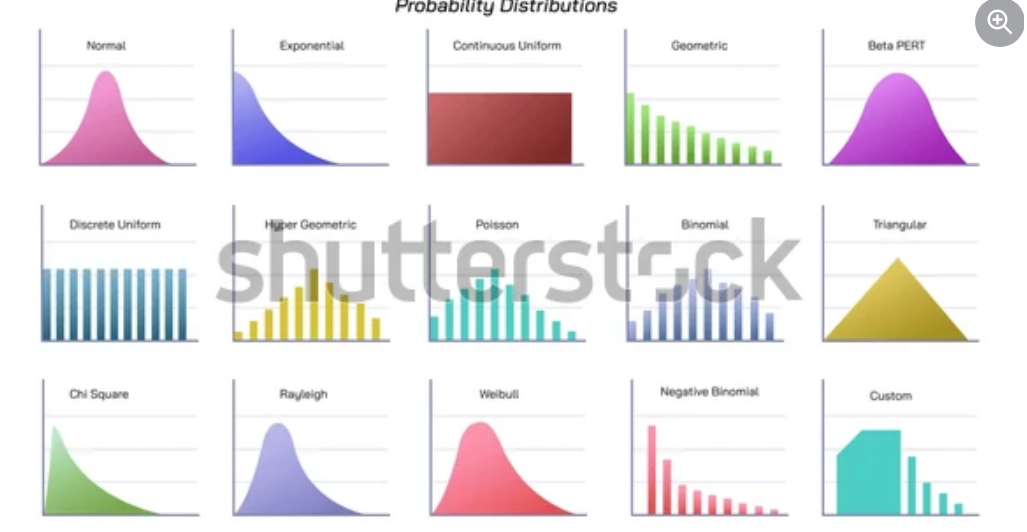